# Clustering

In [1]:
from itertools import cycle
from math import hypot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.cluster import DBSCAN as skDBSCAN

# Datasets
![Atom](data/Atom.png)
![Chainlink](data/Chainlink.png)
![EngyTime](data/EngyTime.png)
![GolfBall](data/GolfBall.png)
![Hepta](data/Hepta.png)
![Lsun](data/Lsun.png)
![Target](data/Target.png)
![Tetra](data/Tetra.png)
![TwoDiamonds](data/TwoDiamonds.png)
![WingNut](data/WingNut.png)

In [2]:
datasets = ['Atom', 'Chainlink', 'EngyTime', 'GolfBall', 'Hepta', 'Lsun', 'Target', 'Tetra', 'TwoDiamonds', 'WingNut']

In [3]:
def open_dataset(name):
    lrn = pd.read_csv('data/' + name + '.lrn', sep='\t', skiprows=4, header=None) \
        .drop([0], axis=1) \
        .values
    cls = pd.read_csv('data/' + name + '.cls', sep='\t', skiprows=1, header=None)[1] \
        .values \
        .flatten()
    return name, lrn, cls

# DBSCAN

In [4]:
class DBSCAN(BaseEstimator, ClusterMixin):

    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
    
    def skfit(self, X, y=None):
        delegate = skDBSCAN(eps=self.eps, min_samples=self.min_samples)
        return delegate.fit(X)
    
    def skfit_predict(self, X, y=None):
        return self.skfit(X, y).labels_
    
    def fit(self, P, y=None):
        NOISE = 0
        C = 0
        N = P.shape[0]
        
        visited = np.zeros(N, dtype=bool)
        clustered = np.zeros(N, dtype=bool)
        labels = np.zeros(N, dtype=int)
        
        def region_query(i):
            return [j for j in np.arange(N) if np.linalg.norm(P[i] - P[j]) < self.eps]
        
        def expand_cluster(i, neighbours):
            p = P[i]
            labels[i] = C
            clustered[i] = True
            while neighbours:
                j = neighbours.pop()
                q = P[j]
                if not visited[j]:
                    visited[j] = True
                    neighbour_neighbours = region_query(j)
                    if len(neighbour_neighbours) >= self.min_samples:
                        neighbours.extend(neighbour_neighbours)
                clustered[j] = True
                labels[j] = C

        for i in np.arange(N):
            p = P[i]
            if visited[i]:
                continue
            visited[i] = True
            neighbours = region_query(i)
            if len(neighbours) < self.min_samples:
                labels[i] = NOISE
            else:
                C += 1
                expand_cluster(i, neighbours)

        self.labels_ = labels - 1
        
        return self

# Plots

In [5]:
def plot(ax, X, labels):
    for k, col in zip(set(labels), cycle('grbcmy')):
        if k == -1: col = 'k'
        p = X[labels == k]
        if p.shape[1] == 2:
            ax.plot(p[:, 0], p[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
        else:
            ax.plot(p[:, 0], p[:, 1], p[:, 2], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
        
def analyze_dataset(dataset, params, height=5):
    name, lrn, cls = dataset
    is3D = lrn.shape[1] == 3
    plots = len(params) + 1
    width = plots * height
    fig, axes = plt.subplots(nrows=1, ncols=plots, figsize=(width, height), subplot_kw=({'projection': '3d'} if is3D else {}))
    plot(axes[0], lrn, cls)
    axes[0].set_title("Данные %s: C=%d" % (name, max(cls)), fontsize=18)
    for i, param in enumerate(params):
        eps, min_samples = param
        clustrer = DBSCAN(eps=eps, min_samples=min_samples)
        labels = clustrer.fit_predict(lrn)
        ax = axes[i + 1]
        plot(ax, lrn, labels)
        ax.set_title("$\epsilon$=%.1f, $m$=%d: C=%d" % (eps, min_samples, max(labels) + 1), fontsize=18)
    fig.tight_layout()
    plt.savefig('pics/' + name + '.png')
    plt.show()

# Tests

## Atom

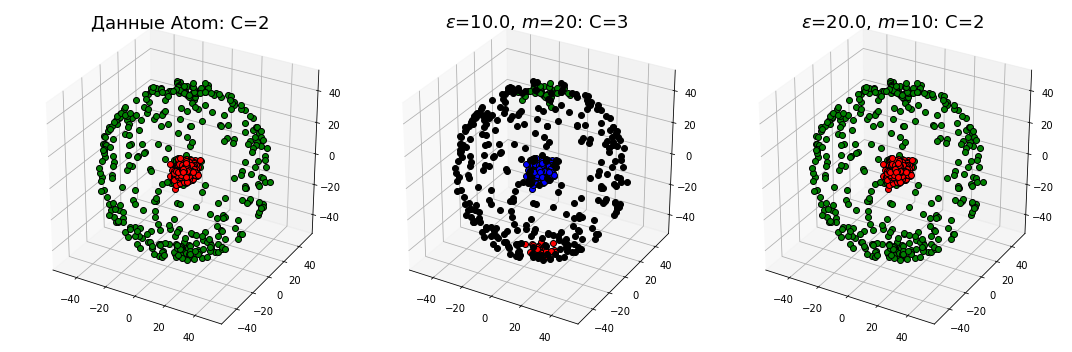

In [6]:
atom = open_dataset('Atom')
analyze_dataset(atom, params=[(10, 20), (20, 10)])

## Chainlink

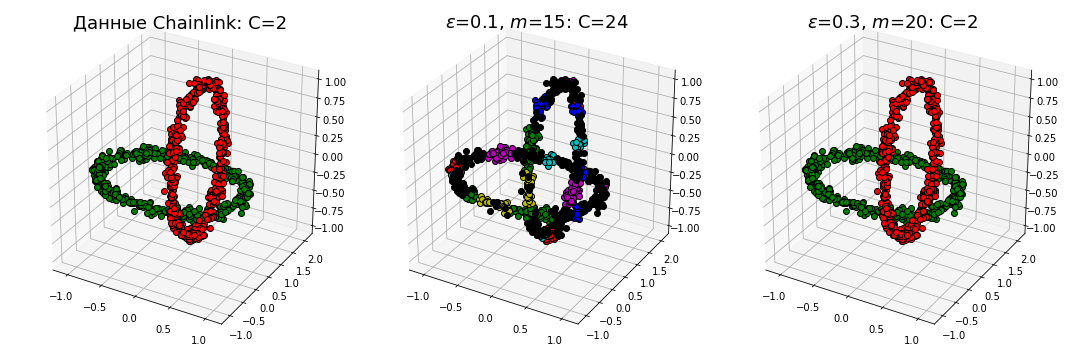

In [7]:
chainlink = open_dataset('Chainlink')
analyze_dataset(chainlink, params=[(0.1, 15), (0.3, 20)])

## EngyTime

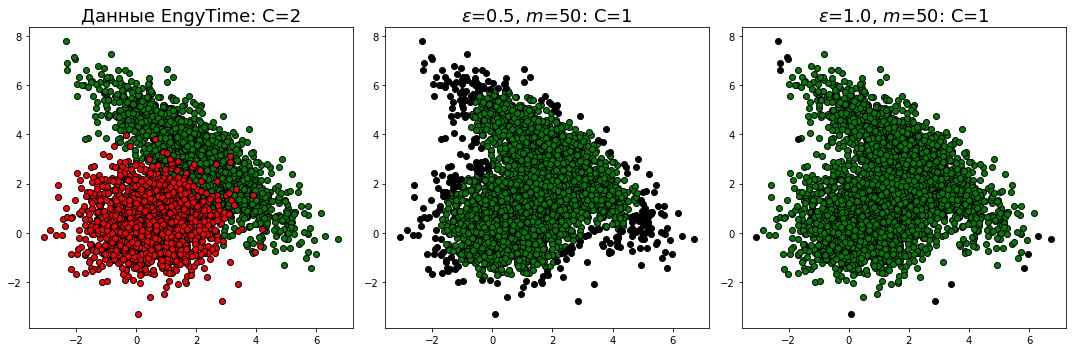

In [8]:
engy_time = open_dataset('EngyTime')
analyze_dataset(engy_time, params=[(0.5, 50), (1, 50)])

## GolfBall

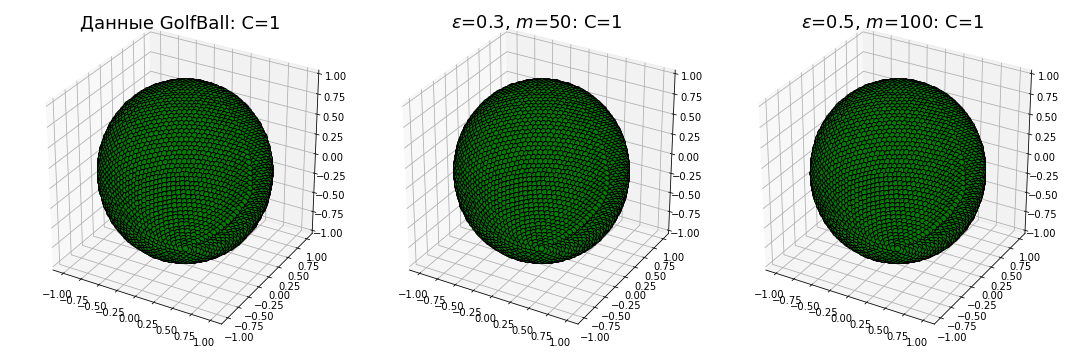

In [9]:
golf_ball = open_dataset('GolfBall')
analyze_dataset(golf_ball, params=[(0.3, 50), (0.5, 100)])

## Hepta

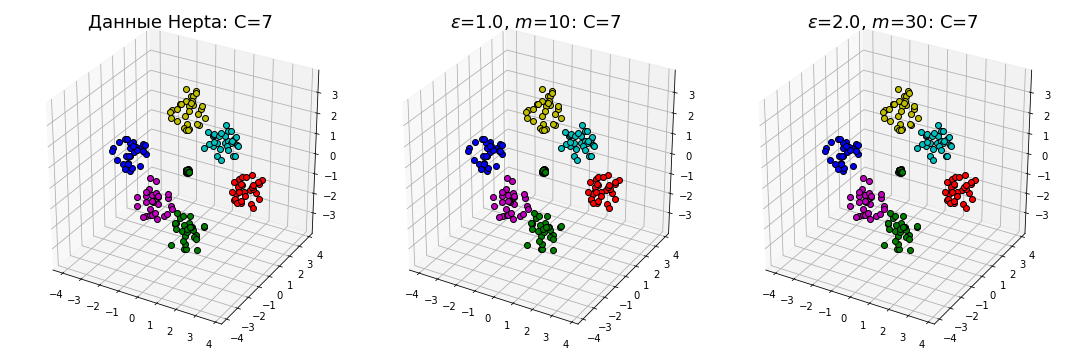

In [10]:
hepta = open_dataset('Hepta')
analyze_dataset(hepta, params=[(1, 10), (2, 30)])

## Lsun

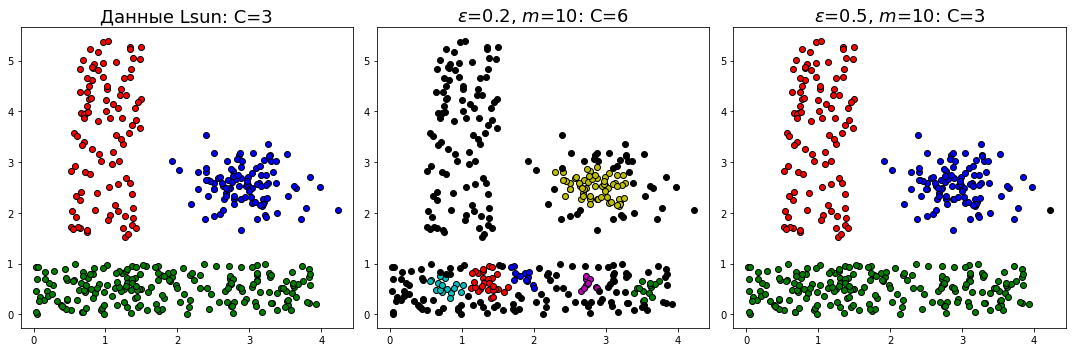

In [11]:
lsun = open_dataset('Lsun')
analyze_dataset(lsun, params=[(0.2, 10), (0.5, 10)])

## Target

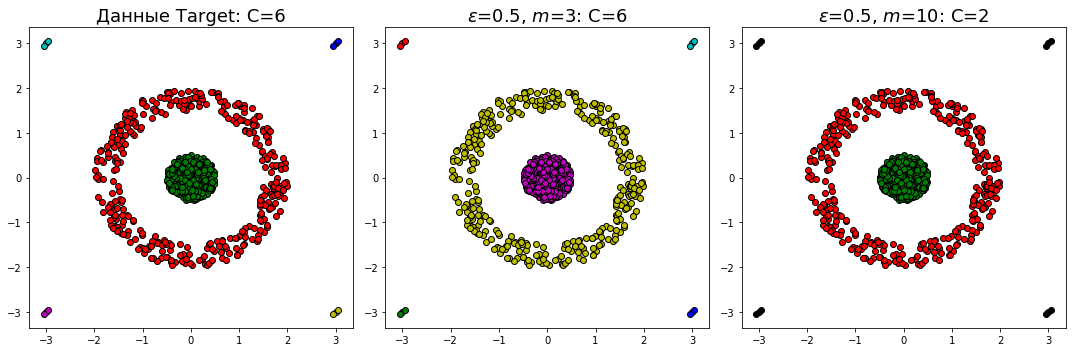

In [12]:
target = open_dataset('Target')
analyze_dataset(target, params=[(0.5, 3), (0.5, 10)])

## Tetra

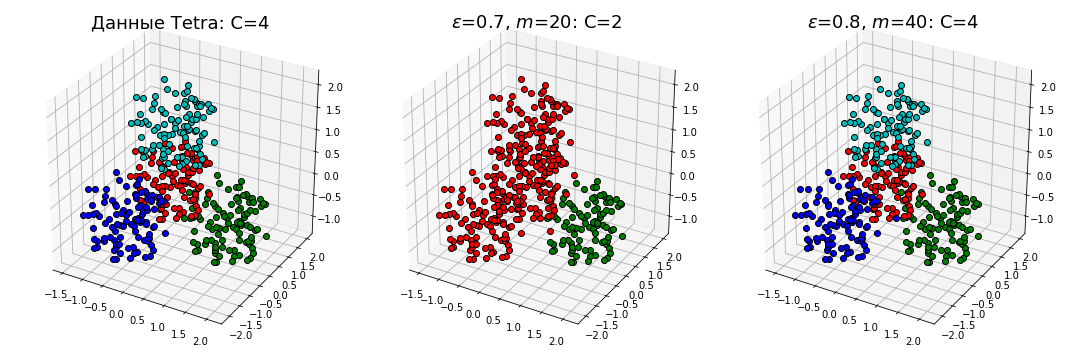

In [13]:
tetra = open_dataset('Tetra')
analyze_dataset(tetra, params=[(0.7, 20), (0.8, 40)])

## TwoDiamonds

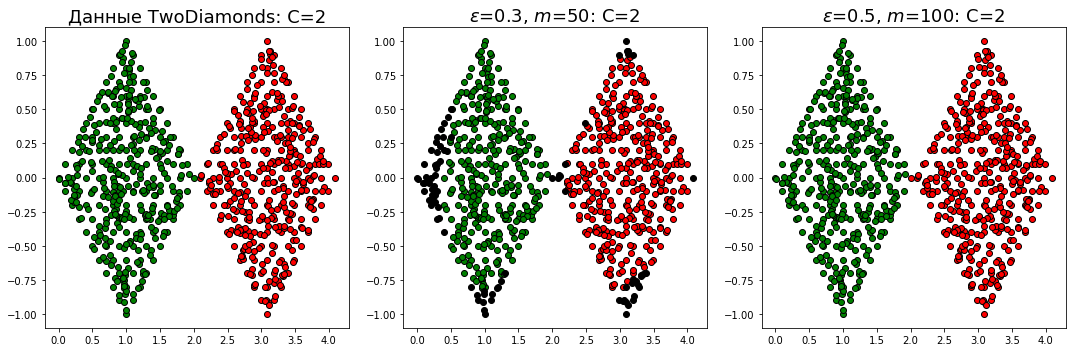

In [14]:
diamonds = open_dataset('TwoDiamonds')
analyze_dataset(diamonds, params=[(0.3, 50), (0.5, 100)])

## WingNut

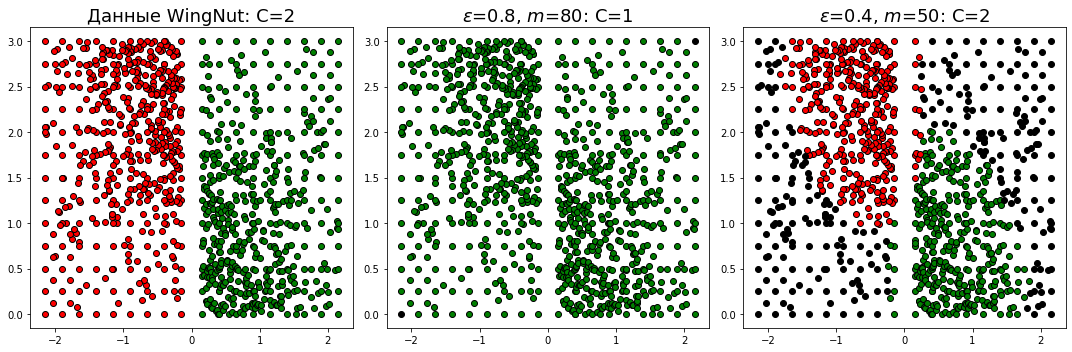

In [15]:
wingnut = open_dataset('WingNut')
analyze_dataset(wingnut, params=[(0.8, 80), (0.4, 50)])